In [ ]:
from extraccion import minioFunctions as mf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ANALISIS VEGETACION + INCENDIOS

In [ ]:
l_i = []
l_v = []
l_s = []
l_p = []
l_V2 = []
l_f = []
for k in [2022, 2023,2024, 2025]:
    print(f"Analizando el año {k}:")
    dataf = mf.bajar_fichero(mf.crear_cliente(), path_server=f"grupo3/raw/Incendios_y_no_incendios/incendios_y_no_incendios_{k}.parquet", type="df")
    datav = mf.bajar_fichero(mf.crear_cliente(), path_server=f"grupo3/raw/Vegetacion/incendios_y_no_incendios_Vegetacion_{k}.parquet", type="df")
    datap = mf.bajar_fichero(mf.crear_cliente(), path_server=f"grupo3/raw/Pendiente/incendios_y_no_incendios_Pendiente_{k}.parquet", type="df")
    datas = mf.bajar_fichero(mf.crear_cliente(), path_server=f"grupo3/raw/Soil_organic_carbon/soil_organic_carbon_{k}.parquet", type="df")
    dataV2 = mf.bajar_fichero(mf.crear_cliente(), path_server=f"grupo3/raw/Vegetacion2/incendios_y_no_incendios_Vegetacion2_{k}.parquet", type="df")
    datad = mf.bajar_fichero(mf.crear_cliente(), path_server=f"grupo3/raw/Fisicas/fisicas_{k}_concat.parquet", type="df")

    l_i.append(dataf)
    l_v.append(datav)
    l_p.append(datap)
    l_s.append(datas)
    l_V2.append(dataV2)
    l_f.append(datad)

df_incendios = pd.concat(l_i, ignore_index=True)
df_vegetacion = pd.concat(l_v, ignore_index=True)
df_tierra = pd.concat(l_s, ignore_index=True)
df_pendiente = pd.concat(l_p, ignore_index=True)
df_vegetacion2 = pd.concat(l_V2, ignore_index=True)
df_fisicas = pd.concat(l_f, ignore_index=True)
    

Analizando el año 2022:
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Analizando el año 2023:
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Analizando el año 2024:
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Analizando el año 2025:
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente
Dataframe importado correctamente


In [ ]:
print(len(df_incendios), len(df_vegetacion), len(df_tierra), len(df_pendiente), len(df_vegetacion2), len(df_fisicas))

73472 73472 73472 73472 73470 73443


In [ ]:
dfi = df_incendios.copy()
dfv = df_vegetacion.copy()
dfs = df_tierra.copy()
dfp = df_pendiente.copy()
dfv2 = df_vegetacion2.copy()
dff = df_fisicas.copy()

In [ ]:
dfi["date_first"] = dfi["date_first"].str[:10]
dfv['date'] = dfv['date'].str[:10]
dfs['date'] = dfs['date'].str[:10]
dfp['date'] = dfp['date'].str[:10]
dfv2['date'] = dfv2['date'].str[:10]
dff['date'] = dff['date'].str[:10]

dfi = dfi.rename(columns={
    "lat_mean": "lat",
    "lon_mean": "lon",
    "date_first": "date"
})

In [ ]:
print(len(dfi), len(dfv), len(dfs), len(dfp), len(dfv2), len(dff))

73472 73472 73472 73472 73470 73443


In [ ]:
dfi = dfi[["lat", "lon", "date", "final"]]
vegetacion = pd.merge(dfi, dfv, on=["lat", "lon", "date"], how="inner")
suelo = pd.merge(dfi, dfs, on=["lat", "lon", "date"], how="inner")
pendiente = pd.merge(dfi, dfp, on=["lat", "lon", "date"], how="inner")
vegetacion2 = pd.merge(dfi, dfv2, on=["lat", "lon", "date"], how="inner")
fisicas = pd.merge(dfi, dff, on=["lat", "lon", "date"], how="inner")

In [ ]:
print(len(vegetacion), len(suelo), len(pendiente), len(vegetacion2), len(fisicas))

73472 73472 73472 73470 73443


In [ ]:
analisis = vegetacion[vegetacion["final"] == 1]
print(analisis.isna().sum(), len(analisis), len(vegetacion))

lat      0
lon      0
date     0
final    0
NDVI     6
NDWI     6
dtype: int64 2757 73472


In [ ]:
observar = vegetacion[vegetacion["final"] == 0]
print(observar.isna().sum(), len(observar), len(vegetacion))

lat         0
lon         0
date        0
final       0
NDVI     1944
NDWI     1944
dtype: int64 70715 73472


In [ ]:
indices_observar_nulos = analisis[analisis.isna().any(axis=1)].index
print(f"Filas con nulos en 'observar': {indices_observar_nulos}")


Filas con nulos en 'observar': Index([460, 35687, 50574, 50595, 50675, 50903], dtype='int64')


Text(0.5, 1.0, 'Distribución de nulos por mes')

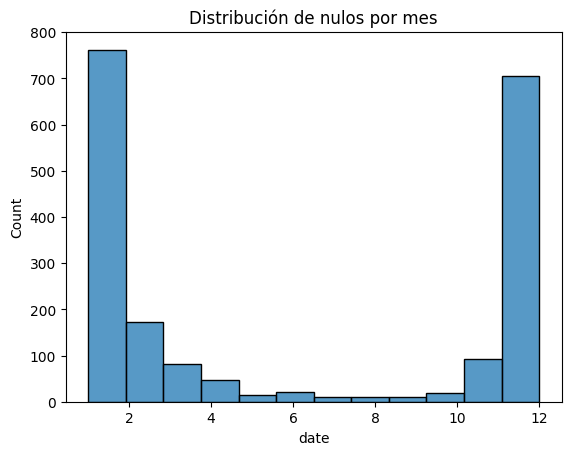

In [ ]:
no_incendiosNulos = observar[observar.isna().any(axis=1)].index
j = pd.to_datetime(dfi['date'])
sns.histplot(j.iloc[no_incendiosNulos].dt.month, bins=12)
plt.title("Distribución de nulos por mes")

In [ ]:
for k in j.dt.month.unique():
    print(f"Mes {k}: {sum(j.dt.month == k)} filas")
    print(f"Mes {k} con nulos: {sum(j.iloc[no_incendiosNulos].dt.month == k)} filas")
    print(f"Porcentaje de nulos en el mes {k}: {sum(j.iloc[no_incendiosNulos].dt.month == k) / sum(j.dt.month == k) * 100:.2f}%\n")

Mes 7: 6227 filas
Mes 7 con nulos: 11 filas
Porcentaje de nulos en el mes 7: 0.18%

Mes 1: 6735 filas
Mes 1 con nulos: 762 filas
Porcentaje de nulos en el mes 1: 11.31%

Mes 8: 6127 filas
Mes 8 con nulos: 10 filas
Porcentaje de nulos en el mes 8: 0.16%

Mes 6: 6138 filas
Mes 6 con nulos: 21 filas
Porcentaje de nulos en el mes 6: 0.34%

Mes 9: 5863 filas
Mes 9 con nulos: 10 filas
Porcentaje de nulos en el mes 9: 0.17%

Mes 3: 6602 filas
Mes 3 con nulos: 81 filas
Porcentaje de nulos en el mes 3: 1.23%

Mes 2: 6585 filas
Mes 2 con nulos: 173 filas
Porcentaje de nulos en el mes 2: 2.63%

Mes 5: 6201 filas
Mes 5 con nulos: 14 filas
Porcentaje de nulos en el mes 5: 0.23%

Mes 4: 6374 filas
Mes 4 con nulos: 46 filas
Porcentaje de nulos en el mes 4: 0.72%

Mes 10: 5698 filas
Mes 10 con nulos: 18 filas
Porcentaje de nulos en el mes 10: 0.32%

Mes 11: 5555 filas
Mes 11 con nulos: 92 filas
Porcentaje de nulos en el mes 11: 1.66%

Mes 12: 5367 filas
Mes 12 con nulos: 706 filas
Porcentaje de nulos 

<Axes: xlabel='date', ylabel='Count'>

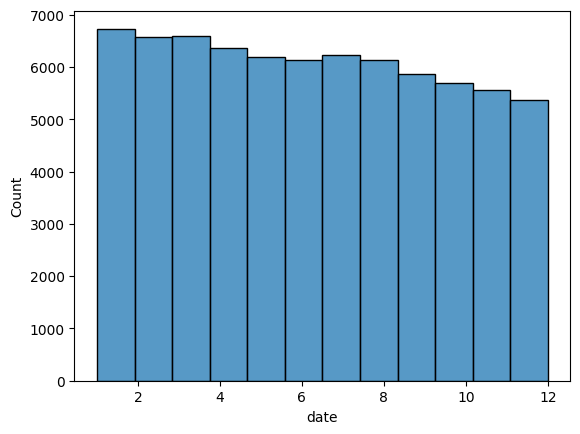

In [ ]:
sns.histplot(j.dt.month, bins=12)

In [ ]:
df_incendios.iloc[indices_observar_nulos]

,lat_mean,lon_mean,frp_sum,frp_mean,count,date_first,date_last,duration_days,area_ha,final
460,49.546110,23.520860,163.11,163.110000,1.0,2022-02-19 00:00:00,2022-02-19,1.0,14.06,1
35687,51.481660,6.715020,53.43,53.430000,1.0,2024-12-01 00:00:00,2024-12-01,1.0,14.06,1
50574,45.143632,29.586695,3513.39,121.151379,29.0,2025-02-24 00:00:00,2025-02-25,2.0,3953.97,1
50595,45.220667,29.202433,1520.77,80.040526,19.0,2025-02-21 00:00:00,2025-03-22,30.0,5590.68,1
50675,46.484864,30.116416,984.27,140.610000,7.0,2025-02-23 00:00:00,2025-03-18,24.0,319.80,1
50903,45.541060,28.977045,166.48,83.240000,2.0,2025-02-21 00:00:00,2025-02-21,1.0,28.12,1


In [ ]:
suelo.iloc[indices_observar_nulos]

,lat,lon,date,final,SOC
460,49.546110,23.520860,2022-02-19,1,NaN
35687,51.481660,6.715020,2024-12-01,1,34.453537
50574,45.143632,29.586695,2025-02-24,1,NaN
50595,45.220667,29.202433,2025-02-21,1,NaN
50675,46.484864,30.116416,2025-02-23,1,NaN
50903,45.541060,28.977045,2025-02-21,1,NaN


In [ ]:
pendiente.iloc[indices_observar_nulos]

,lat,lon,date,final,elevacion_centro,grados,porcentaje
460,49.546110,23.520860,2022-02-19,1,262.794464,0.052488,0.091608
35687,51.481660,6.715020,2024-12-01,1,29.000000,2.780289,4.856331
50574,45.143632,29.586695,2025-02-24,1,-1.000000,2.272594,3.968506
50595,45.220667,29.202433,2025-02-21,1,0.000000,1.316517,2.298160
50675,46.484864,30.116416,2025-02-23,1,0.000000,2.291251,4.001120
50903,45.541060,28.977045,2025-02-21,1,17.000000,1.324000,2.311227


Al observar los indices que provocan nulos se observa que respecto a la vegetacion hay 6 puntos con datos nulos vinculados a incendios. Por otra parte hay 2083 vinculados a no incendios. Borraremos todos salvo un punto de incendio cuyo area y duracion destaca. Hay un dato atipico que fisicamente extraño ya que indica que 4000 ha se sofocan en 2 dias.

Cabe destacar el hecho de que todos los incendios nulos salvo 2 (incluido el conservado) tienen un SOC tambien nulo por lo que es positivo eliminarlos

# ANALISIS SOC + INCENDIOS

In [ ]:
analisis = suelo[suelo["final"] == 1]
print(analisis.isna().sum(), len(analisis), len(suelo))
print(f'Porcentaje de filas con nulos en "analisis": {analisis.isna().any(axis=1).mean() * 100:.2f}%')

lat         0
lon         0
date        0
final       0
SOC      1456
dtype: int64 2757 73472
Porcentaje de filas con nulos en "analisis": 52.81%


In [ ]:
observar = suelo[suelo["final"] == 0]
print(observar.isna().sum(), len(observar), len(suelo))
print(f'Porcentaje de filas con nulos en "observar": {observar.isna().any(axis=1).mean() * 100:.2f}%')


lat          0
lon          0
date         0
final        0
SOC      17457
dtype: int64 70715 73472
Porcentaje de filas con nulos en "observar": 24.69%


In [ ]:
indices_observar_nulos = analisis[analisis.isna().any(axis=1)].index
print(f"Filas con nulos en 'observar': {indices_observar_nulos}")

Filas con nulos en 'observar': Index([    3,     7,     9,    15,    18,    21,    24,    25,    30,    31,
       ...
       51376, 51377, 51378, 51379, 51380, 51382, 51383, 51385, 51387, 51389],
      dtype='int64', length=1456)


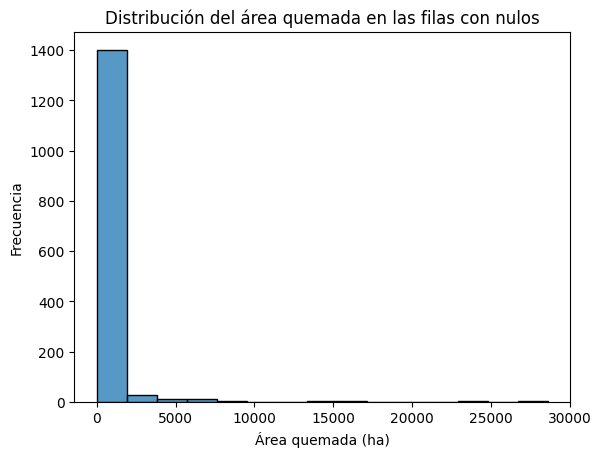

In [ ]:
borrar = df_incendios.iloc[indices_observar_nulos]
sns.histplot(borrar['area_ha'], bins=15)
plt.title("Distribución del área quemada en las filas con nulos")
plt.xlabel("Área quemada (ha)")
plt.ylabel("Frecuencia")
plt.show()

El suelo presenta un grave problema ya que mas del 50% de los datos que afectan a incendios son nulos, lo cual no se puede solucionar solo con el borrado

Ademas tambien esta variable el 25% de sus datos que afectan a no incendios tambien son nulo. 

Basicamente esta variable aunque sea informativa **no aporta los suficientes datos como para ser concluyente por lo que se ignora**

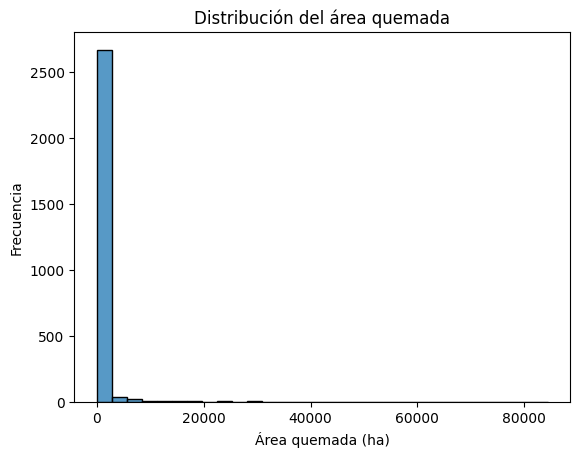

In [ ]:
sns.histplot(df_incendios['area_ha'], bins=30)
plt.title("Distribución del área quemada")
plt.xlabel("Área quemada (ha)")
plt.ylabel("Frecuencia")
plt.show()

# ANALISIS DE FISICAS + INCENDIOS

In [ ]:
analisis = fisicas[fisicas["final"] == 1]
print(analisis.isna().sum(), len(analisis), len(fisicas))
print('Porcentaje de filas con nulos en "analisis": {:.2f}%'.format(analisis.isna().any(axis=1).mean() * 100))

lat                    0
lon                    0
date                   0
final                  0
temp_mean             40
temp_max              40
temp_min              40
humidity_mean         40
precipitation         40
wind_speed_max        40
wind_gusts_max        40
pressure_mean         40
cloud_cover           40
radiation             40
evapotranspiration    40
sunshine_seconds      40
dtype: int64 2728 73443
Porcentaje de filas con nulos en "analisis": 1.47%


In [ ]:
observar = fisicas[fisicas["final"] == 0]
print(observar.isna().sum(), len(observar), len(fisicas))
no_incendiosNulosFisicas = observar[observar.isna().any(axis=1)].index

lat                     0
lon                     0
date                    0
final                   0
temp_mean             726
temp_max              726
temp_min              726
humidity_mean         726
precipitation         726
wind_speed_max        726
wind_gusts_max        726
pressure_mean         726
cloud_cover           726
radiation             726
evapotranspiration    726
sunshine_seconds      726
dtype: int64 70715 73443


Text(0.5, 1.0, 'Distribución de Incendios por Mes')

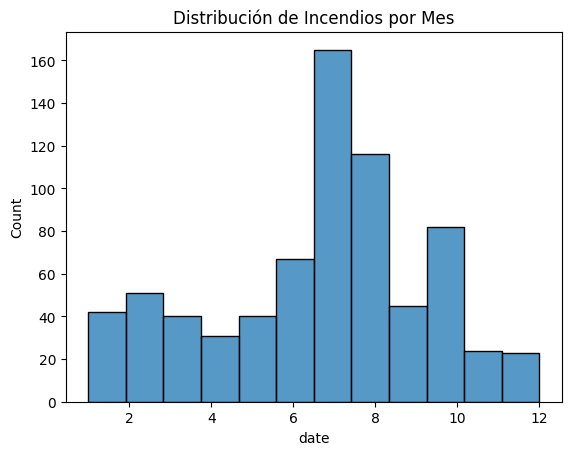

In [ ]:
sns.histplot(j.iloc[no_incendiosNulosFisicas].dt.month, bins=12)
plt.title("Distribución de Incendios por Mes")

In [ ]:
print(len(no_incendiosNulosFisicas), len(no_incendiosNulos))

726 1944


2668


Text(0.5, 1.0, 'Distribución de Incendios por Mes (Total Nulos)')

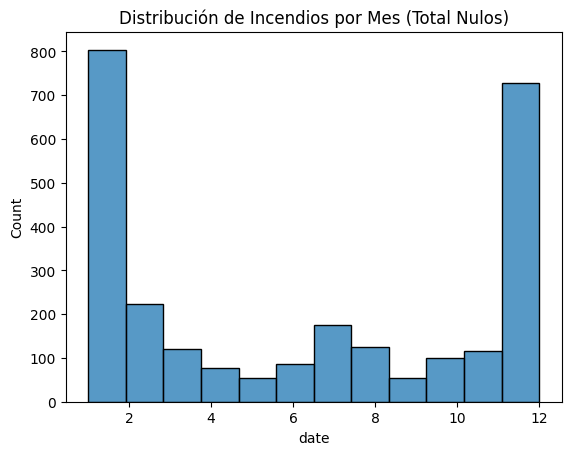

In [ ]:
indiceTotal = set(no_incendiosNulos).union(set(no_incendiosNulosFisicas))
print(len(indiceTotal))
sns.histplot(j.iloc[list(indiceTotal)].dt.month, bins=12)
plt.title("Distribución de Incendios por Mes (Total Nulos)")

In [ ]:
analisis = pendiente[pendiente["final"] == 1]
print(analisis.isna().sum(), len(analisis), len(pendiente))
print('Porcentaje de filas con nulos en "analisis": {:.2f}%'.format(analisis.isna().any(axis=1).mean() * 100))

lat                   0
lon                   0
date                  0
final                 0
elevacion_centro     24
grados              133
porcentaje            0
dtype: int64 2757 73472
Porcentaje de filas con nulos en "analisis": 4.82%


In [ ]:
observar = pendiente[pendiente["final"] == 0]
print(observar.isna().sum(), len(observar), len(pendiente))
print('Porcentaje de filas con nulos en "observar": {:.2f}%'.format(observar.isna().any(axis=1).mean() * 100))

lat                    0
lon                    0
date                   0
final                  0
elevacion_centro    7172
grados              8941
porcentaje             0
dtype: int64 70715 73472
Porcentaje de filas con nulos en "observar": 12.64%


Text(0.5, 1.0, 'Distribución de Incendios por Mes (Pendiente con nulos)')

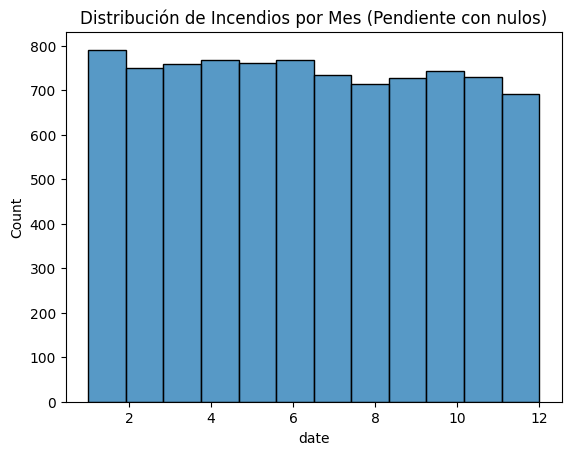

In [ ]:
pendiente_sinteticosNulos = observar[observar.isna().any(axis=1)].index
sns.histplot(j.iloc[pendiente_sinteticosNulos].dt.month, bins=12)
plt.title("Distribución de Incendios por Mes (Pendiente con nulos)")

# CONCLUSION

Nuestra conclusion es la siguiente:

Los nulos presentes en fisicas son borrables porque no afectan en mayor medida a los incendios ni tampoco a la distribucion de los puntos sinteticos. Los nulos solo afectan al 1% de los incendios y los sinteticos. **No es una variable problematica**. Cabe decir que en vegetacion2 no hay presencia de nulos

Sin embargo, los nulos presentes en vegetacion presentan un sesgo importante: afectan en mayor medida (mas de 10 veces) a los meses de diciembre y enero debido a su nubosidad. Hemos corregido esto mediante un cambio en los parametros de entrada

La pendiente por su parte afecta a 133 incendios lo cual es importante ya que es el 5% de los datos que tenemos de esa clase. Ademas, hay 9000 nulos que afectan de manera equitativa mensualmente a los puntos sinteticos, representando mas del 10% de los datos sinteticos. Hay que revisar esta variable

# POSTERIOR
(ignorar por ahora)

In [ ]:
cliente = mf.crear_cliente()

ruta_minio = bucket_name + '/' + file_name

df_incendios = mf.bajar_fichero(cliente, path_server=ruta_minio, type="df")

if df_incendios is None:
    print("Se ha producido un error al descargar el archivo.")

assert not df_incendios.empty, "El DataFrame descargado está vacío. Verifica el archivo en MinIO."

# Hasta aqui se ha descargado el archivo, ahora empieza la limipieza de datos

condicion_no_es_otro = df_incendios['vegetacion2'].astype(str).str.strip().str.lower() != 'otro'

condicion_no_es_sinDatos = df_incendios['vegetacion2'].astype(str).str.strip().str.lower() != 'sin datos'

df_incendios = df_incendios[condicion_no_es_sinDatos & condicion_no_es_otro]

# Quito las posibles zonas de agua y urbanas

aguaUrbano = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 34, 33, 36, 37, 38, 39, 40, 41, 42, 43]

df_mapa = mf.bajar_fichero(cliente, path_server="grupo3/mapa/mapa_vegetacion.csv", type="df")
ecosistemas_ignorar = df_mapa.loc[df_mapa['Unnamed: 0'].isin(aguaUrbano), 'Column6'].tolist()

df_incendios = df_incendios[
(~df_incendios['vegetacion2'].isin(ecosistemas_ignorar))]

#Limpieza de nulos

# mf.subir_fichero(cliente, ruta_minio, df_incendios)

NameError: name 'bucket_name' is not defined